In [1]:
import cupy as cp
import matplotlib.pyplot as plt
from tomo import Tomo

In [2]:
def mshow_complex(a, **args):
    if isinstance(a, cp.ndarray):
        a = a.get()
    fig, axs = plt.subplots(1, 2, figsize=(14,6))
    im = axs[0].imshow(a.real, cmap="gray", **args)
    fig.colorbar(im, fraction=0.046, pad=0.04)
    im = axs[1].imshow(a.imag, cmap="gray", **args)
    fig.colorbar(im, fraction=0.046, pad=0.04)
    plt.show()


# Read object (2 slices) placed as 1 complex64

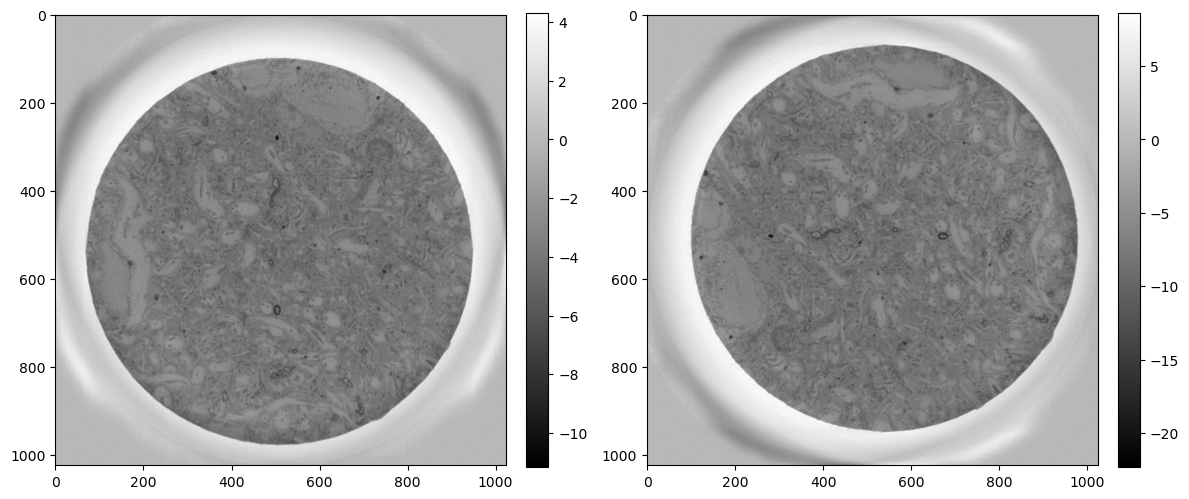

In [3]:
obj = cp.load('obj.npy')+2*1j*cp.load('obj.npy').swapaxes(1,2)
[nz,n,n] = obj.shape
mshow_complex(obj[nz//2])

(1, 1024, 1024)


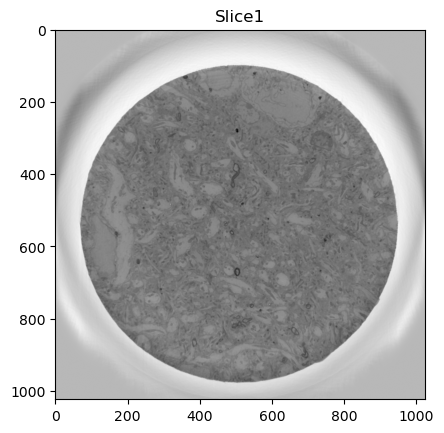

In [4]:
obj_real = cp.load('obj.npy')
import numpy as np
obj_real = cp.asnumpy(obj_real)
print(np.shape(obj_real))
fig = plt.figure()
plt.imshow(obj_real[0, :, :], cmap="gray")
plt.title("Slice1")
plt.show()

# Create class

In [5]:
ntheta = 3*n//4
theta = cp.linspace(0,cp.pi,ntheta).astype('float32')
cl = Tomo(n,theta,mask_r=1,raxis=None) # mask_r - circle radius for the mask, raxis - rotation axis (None if at the middle)

# Adjoint test

In [61]:
a = cp.random.random([nz,n,n]).astype('float32')
b = cp.random.random([nz,ntheta,n]).astype('float32')
Ra = cl.fwd_tomo(a)
RTb = cl.adj_tomo(b)
print(cp.sum(a*RTb.conj()))
print(cp.sum(Ra*b.conj()))

(178253.77+0.04868541j)
(178253.88+0.049123462j)


# Generate data

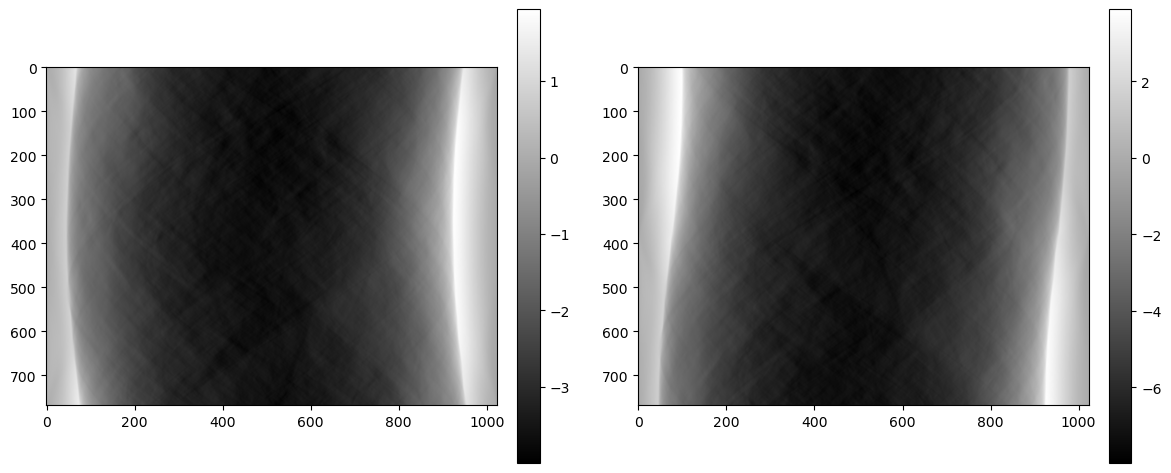

In [ ]:
data = cl.fwd_tomo(obj)
mshow_complex(data[nz//2])

# Solve with the conjugate-gradients

iter 0 err=1803364.75
iter 32 err=4.842631816864014
iter 64 err=0.010634656064212322
iter 96 err=0.0005570540088228881


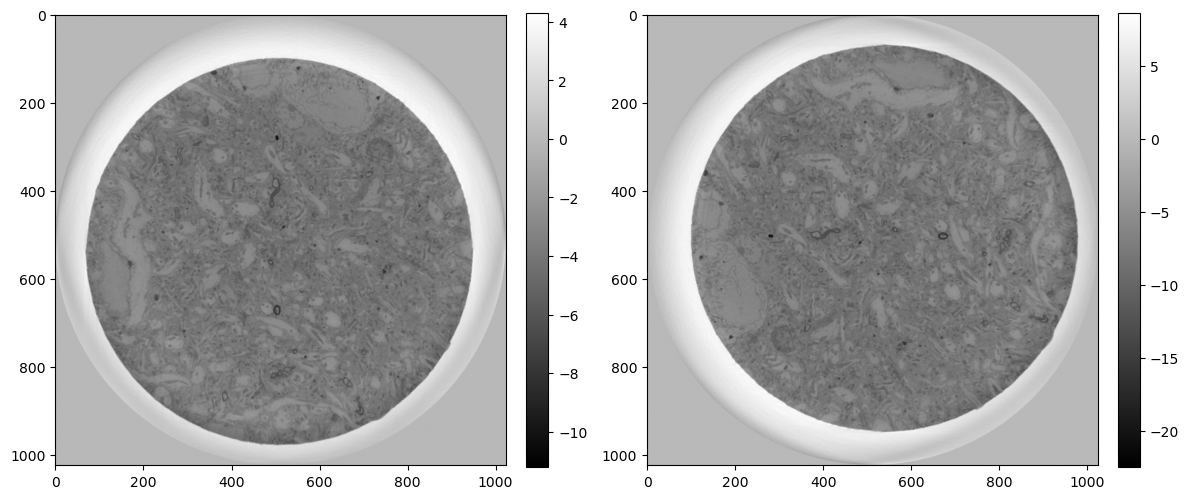

In [13]:
obj_init = cp.zeros([nz, n, n], dtype='complex64')        
rec = cl.rec_tomo(data,obj_init,100)

mshow_complex(rec[nz//2])

# Error

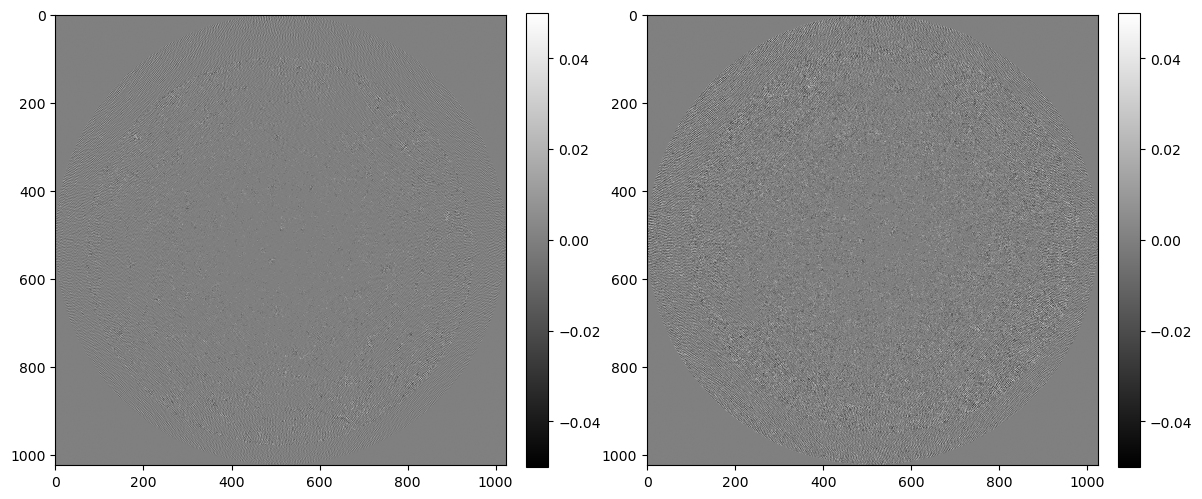

In [14]:
mshow_complex(rec[nz//2]*cl.mask-obj[nz//2]*cl.mask,vmin=-0.05,vmax=0.05)